# Jonna Jinton Youtube Channel Analysis

YouTube is a video-sharing platform where users can upload, share, and view videos. With over 2 billion monthly active users, it is one of the largest social media platforms in the world. YouTube provides access to a vast amount of data, including views, likes, comments, and more, which can be analyzed to gain insights into audience behavior and content performance.

In this project, I performed an analysis of the Jonna Jinton YouTube channel. I used the YouTube API Python library to retrieve data such as video titles, descriptions, tags, view counts, and durations. I also used various Python libraries such as pandas, matplotlib, and seaborn for data analysis and visualization.

The objective of this project was to gain insights into the performance and growth of the Jonna Jinton channel. I analyzed factors such as video duration, publishing year, and tags to understand their relationship with the view count. Our analysis aimed to identify trends, patterns, and areas for improvement to help the channel grow and succeed.

However, it's important to note that the data obtained from the YouTube API has limitations, such as only providing data for videos that are publicly available and excluding data from private or deleted videos. Additionally, the data may not be entirely accurate as view counts may not reflect actual views due to factors such as bot views or ad views.

Overall, this project aimed to provide insights into the performance of the Jonna Jinton channel and highlight the potential use of data analysis in optimizing content and growing a YouTube channel.

Questions for this project:

1. How long is the average video duration?
2. What are the top 10 most viewed videos and what are the 10 less viewed videos in the dataset?
3. What is the distribution of the view counts for the videos?
4. How has the COVID-19 pandemic affected the performance and growth of Jonna Jinton's channel?
5. How many videos were published in each year?
6. Which tags appear most frequently?
7. What is the correlation between the number of views and the number of likes for the videos?

In [228]:
# Importing all necessary libraries 

from googleapiclient.discovery import build       # geting credentials and create an API client
import pandas as pd                               # for data analysis
from IPython.display import JSON                  # for working with data in JSON format

import matplotlib.pyplot as plt                   # ploting results
import matplotlib.ticker as ticker
import seaborn as sns   

sns.set_style('darkgrid')

In [66]:
# Generated API key
api_key = 'A-----------------------------'

In [104]:
channel_id = ['UCAk3t7WHs2zjsZpopox8Taw']

In [105]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [145]:
def get_channel_stats(youtube, channel_id):
    
    all_data = []
    
    request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=''.join(channel_id)                            # Jonna Jinton Youtube channel id
    )
    response = request.execute()

    for i in response['items']:
        data = {'channelName': i['snippet']['title'],
                'subsctibers': i['statistics']['subscriberCount'],
                'views': i['statistics']['viewCount'],
                'totalVideos': i['statistics']['videoCount'],
                'playlistid': i['contentDetails']['relatedPlaylists']['uploads'],  
        }
        
        all_data.append(data)
    return(pd.DataFrame(all_data))

In [146]:
stats = get_channel_stats(youtube, channel_id)

In [147]:
stats

,channelName,subsctibers,views,totalVideos,playlistid
0,Jonna Jinton,4340000,399503396,351,UUAk3t7WHs2zjsZpopox8Taw


In [148]:
def get_video_ids(youtube, playlist_id):
    """
    Get list of video IDs of all videos in a playlist
    Params:
    youtube (googleapiclient.discovery.Resource): An authorized YouTube API client object.
    channel_ids (list): playlistid to get video for.
    
    Returns:
    - video_ids: list of video IDs
    """
    video_ids = []
    next_page_token = None
    
    # Iterate through all playlist items to get video IDs
    while True:
        # Make API request for playlist items
        request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=playlist_id,
            maxResults=50,
            pageToken=next_page_token)
        response = request.execute()

        # Append video IDs to list
        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        # Check if there are more pages
        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break

    return video_ids

In [149]:
video_ids = get_video_ids(youtube, playlist_id)

In [150]:
# Checking the total number of videos in the channel if it match with the stats df
f'Total amount of video in the channel is: {len(video_ids)}'

'Total amount of video in the channel is: 351'

In [136]:
def get_channel_stats(youtube, channel_ids):
    """
    Get channel statistics: title, subscriber count, view count, video count, upload playlist
    
    Parameters:
    youtube (googleapiclient.discovery.Resource): An authorized YouTube API client object.
    channel_ids (list): List of channel IDs to get statistics for.
    
    Returns:
    pandas.DataFrame: A DataFrame containing the statistics for a channel.
    """
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute()
    
    all_data = [{
        'channelName': item['snippet']['title'],
        'subscribers': item['statistics']['subscriberCount'],
        'views': item['statistics']['viewCount'],
        'totalVideos': item['statistics']['videoCount'],
        'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
    } for item in response['items']]
    
    return pd.DataFrame(all_data)

In [151]:
video_df = get_video_details(youtube, video_ids)

In [152]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,JyGNg8a6V6E,Jonna Jinton,A Tour in my New house,I'm so happy to finally share with you about t...,"[jonna, jinton, jonna jinton, sweden, swedish,...",2023-02-26T14:56:53Z,412017,34878,None,2842,PT31M55S,hd,true
1,UT-Qov45btc,Jonna Jinton,An evening Ice bath,"Some scenes from a beautiful november evening,...","[Ice bath, Ice, Ice swim, Polar plunge, Wim ho...",2023-02-17T18:14:04Z,67207,8037,None,281,PT1M1S,hd,false
2,Rou2dBFdwtI,Jonna Jinton,The Nordic herdingcall - kulning,This is the very first video I recorded of mys...,"[kulning, herding call, nordic, viking, north,...",2023-02-14T16:51:46Z,115571,13805,None,339,PT26S,hd,false
3,clAixnv4OM8,Jonna Jinton,Daily life by the Mystic Forest | Winter in Sw...,I'm so happy to be back with a video from my d...,"[jonna, jinton, jonna jinton, sweden, swedish,...",2023-02-10T15:18:43Z,522373,38580,None,3643,PT38M50S,hd,true
4,fCEmBAHV02k,Jonna Jinton,Fullmoon over my home,The last view of the fullmoon early this morni...,None,2023-02-06T17:28:49Z,77590,12665,None,305,PT19S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,DSulSqD7koM,Jonna Jinton,"www.jonnajinton.se ""Renoverar hallen""",► MY SOCIAL MEDIA AND LINKS!\n• My Art & Jewel...,"[jonna, jinton, jonnajinton, jonnablogg, blogg...",2011-03-31T21:58:28Z,36880,1163,None,35,PT1M40S,sd,false
347,O-s33HaOCPo,Jonna Jinton,"www.jonnajinton.se ""Hard work work""",► MY SOCIAL MEDIA AND LINKS!\n• My Art & Jewel...,"[jonna, jinton, jonnajinton, ångermanland, jäm...",2011-02-24T13:22:23Z,65219,1881,None,58,PT3M7S,sd,false
348,OMIdsapCV1M,Jonna Jinton,"www.jonnajinton.se ""Renskiljning""",► MY SOCIAL MEDIA AND LINKS!\n• My Art & Jewel...,"[jonna, jinton, jonnajinton, ångermanland, jäm...",2011-02-01T23:25:18Z,34286,1250,None,77,PT1M2S,sd,false
349,kHF81y2Y36E,Jonna Jinton,"www.jonnajinton.se ""Söndagsmys med Nanook""",Jag och Nanook myser i soffan en stund :)\n\n►...,"[jonna, jonnajinton, jonnablogg, blogg, jinton...",2011-01-30T11:43:54Z,54973,1899,None,76,PT59S,sd,false


In [153]:
video_df.to_csv('video_data_v2.csv')

# Data Cleaning and Processing

In [154]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,JyGNg8a6V6E,Jonna Jinton,A Tour in my New house,I'm so happy to finally share with you about t...,"[jonna, jinton, jonna jinton, sweden, swedish,...",2023-02-26T14:56:53Z,412017,34878,None,2842,PT31M55S,hd,true
1,UT-Qov45btc,Jonna Jinton,An evening Ice bath,"Some scenes from a beautiful november evening,...","[Ice bath, Ice, Ice swim, Polar plunge, Wim ho...",2023-02-17T18:14:04Z,67207,8037,None,281,PT1M1S,hd,false
2,Rou2dBFdwtI,Jonna Jinton,The Nordic herdingcall - kulning,This is the very first video I recorded of mys...,"[kulning, herding call, nordic, viking, north,...",2023-02-14T16:51:46Z,115571,13805,None,339,PT26S,hd,false
3,clAixnv4OM8,Jonna Jinton,Daily life by the Mystic Forest | Winter in Sw...,I'm so happy to be back with a video from my d...,"[jonna, jinton, jonna jinton, sweden, swedish,...",2023-02-10T15:18:43Z,522373,38580,None,3643,PT38M50S,hd,true
4,fCEmBAHV02k,Jonna Jinton,Fullmoon over my home,The last view of the fullmoon early this morni...,None,2023-02-06T17:28:49Z,77590,12665,None,305,PT19S,hd,false


In [155]:
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

### Having the correct data type is important for several reasons:

- **Data integrity**: Data types help ensure that the data is accurate and consistent. For example, a numerical field should only contain numbers, and a date field should only contain dates.

- **Storage efficiency**: Using the correct data type can save storage space. For example, storing a numerical field as a string will use more storage space.

- **Analysis efficiency**: Using the correct data type can improve the efficiency of data analysis. For example, numerical calculations will be faster if the data is stored as a numeric data type.

In the case of the provided dtypes, some columns like **viewCount**, **likeCount**, **commentCount** and **duration** should be converted to `numeric` data types to allow for numerical analysis, while **publishedAt** should be converted to a `datetime` data type for time-based analysis and we need to remove **favouriteCount** columns since it contains `None` values.

In [156]:
video_df['likeCount'] = pd.to_numeric(video_df['likeCount'])
video_df['viewCount'] = pd.to_numeric(video_df['viewCount'])
video_df['commentCount'] = pd.to_numeric(video_df['commentCount'])

In [209]:
video_df.drop('favouriteCount', axis = 1, inplace=True)

In [246]:
# video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt']).dt.strftime('%Y-%m-%d')
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'])

In [247]:
video_df.dtypes

video_id                      object
channelTitle                  object
title                         object
description                   object
tags                          object
publishedAt           datetime64[ns]
viewCount                      int64
likeCount                      int64
commentCount                 float64
duration                      object
definition                    object
caption                       object
duration_formatted            object
duration_seconds             float64
year_published                 int64
dtype: object

In [248]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,duration_formatted,duration_seconds,year_published
0,JyGNg8a6V6E,Jonna Jinton,A Tour in my New house,I'm so happy to finally share with you about t...,"[jonna, jinton, jonna jinton, sweden, swedish,...",2023-02-26,412017,34878,2842.0,PT31M55S,hd,true,31 min 55 sec,1915.0,2023
1,UT-Qov45btc,Jonna Jinton,An evening Ice bath,"Some scenes from a beautiful november evening,...","[Ice bath, Ice, Ice swim, Polar plunge, Wim ho...",2023-02-17,67207,8037,281.0,PT1M1S,hd,false,1 min 1 sec,61.0,2023
2,Rou2dBFdwtI,Jonna Jinton,The Nordic herdingcall - kulning,This is the very first video I recorded of mys...,"[kulning, herding call, nordic, viking, north,...",2023-02-14,115571,13805,339.0,PT26S,hd,false,0 min 26 sec,26.0,2023
3,clAixnv4OM8,Jonna Jinton,Daily life by the Mystic Forest | Winter in Sw...,I'm so happy to be back with a video from my d...,"[jonna, jinton, jonna jinton, sweden, swedish,...",2023-02-10,522373,38580,3643.0,PT38M50S,hd,true,38 min 50 sec,2330.0,2023
4,fCEmBAHV02k,Jonna Jinton,Fullmoon over my home,The last view of the fullmoon early this morni...,None,2023-02-06,77590,12665,305.0,PT19S,hd,false,0 min 19 sec,19.0,2023


# 1. How long is the average video duration?

In [240]:
# convert duration_formatted column into seconds
video_df['duration_seconds'] = pd.to_timedelta(video_df['duration_formatted']).dt.total_seconds()

# calculate the average duration in seconds
average_duration_seconds = video_df['duration_seconds'].mean()

# convert the average duration into minutes and seconds
average_duration_minutes, average_duration_seconds = divmod(average_duration_seconds, 60)

# print the result
print(f"The average video duration is {int(average_duration_minutes)} minutes and {int(average_duration_seconds)} seconds.")

The average video duration is 9 minutes and 43 seconds.


#### After analyzing sample data, the typical length of videos is **9 minutes and 43 seconds**. 

This information can provide valuable insights into the preferences of viewers and can be used to inform content creation strategies. For example, if viewers tend to prefer shorter or longer videos, this information can be taken into account when planning new content. Additionally, understanding the average video length can inform ad placement or sponsorship opportunities for videos of similar length. Overall, this data can help content creators better understand their audience and optimize their content accordingly.

#### Here are some limitations that should be kept in mind when interpreting the result that the average video duration is 9 minutes and 43 seconds:

**Sample size:** The result is only as good as the sample size used in the analysis. If the sample size is small or biased in some way, then the average may not be representative of the entire population of videos.

**Data quality:** The accuracy of the result also depends on the quality of the data used. If the data has missing values or errors, then the result may not be accurate.

**Time period:** The result may only be valid for a specific time period, as viewer preferences and content trends can change over time.

**Video type:** The analysis may not differentiate between different types of videos, such as educational videos, entertainment videos, or promotional videos. Different types of videos may have different average lengths.

**Platform bias:** The analysis may be biased towards a particular video platform or website, and may not be representative of the entire internet.

# 2. What are the top 10 most viewed videos and what are the 10 less viewed videos in the dataset?

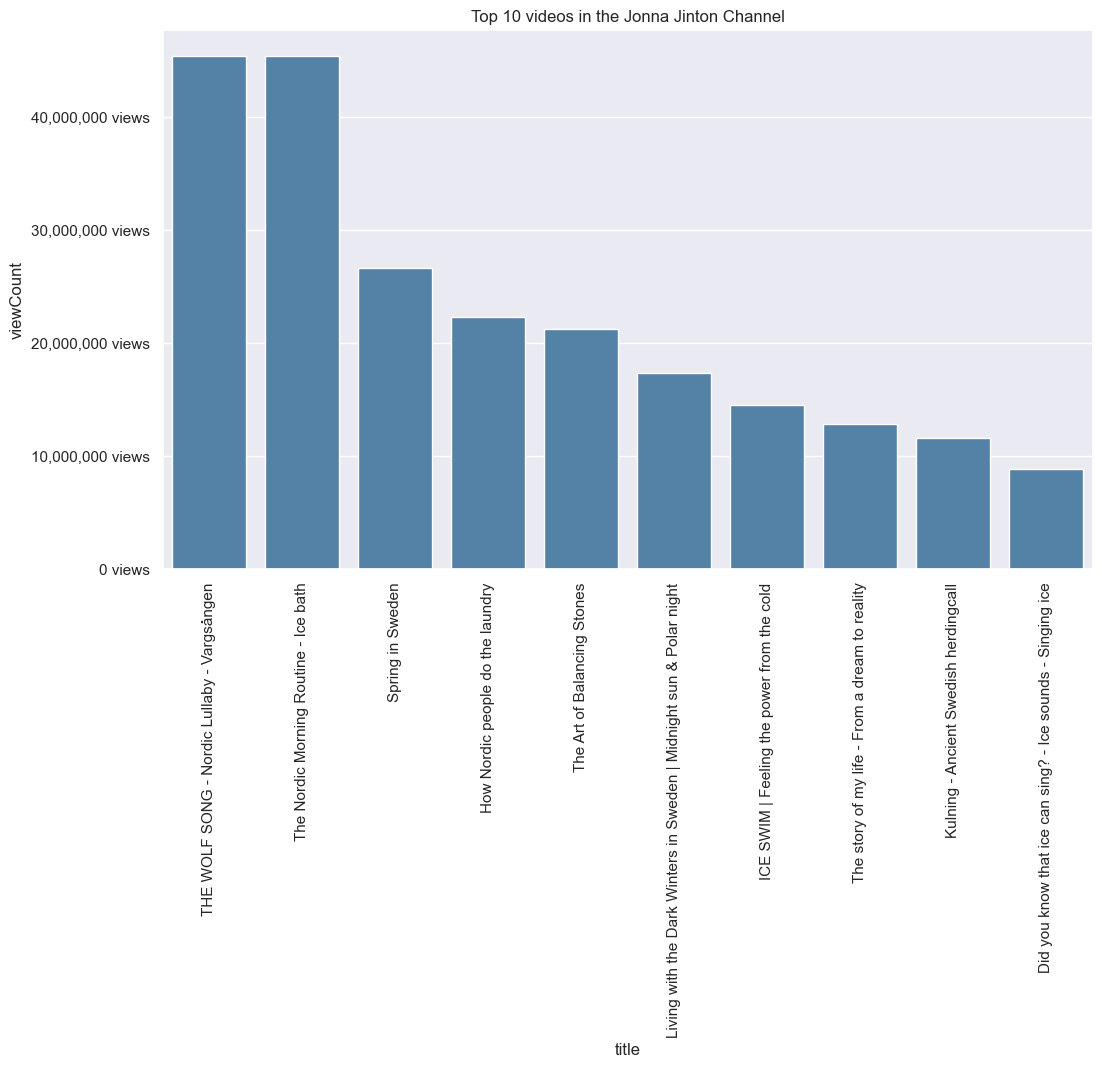

In [241]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending = False)[0:10], color='steelblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Top 10 videos in the Jonna Jinton Channel')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1) + ' views'))
plt.show()

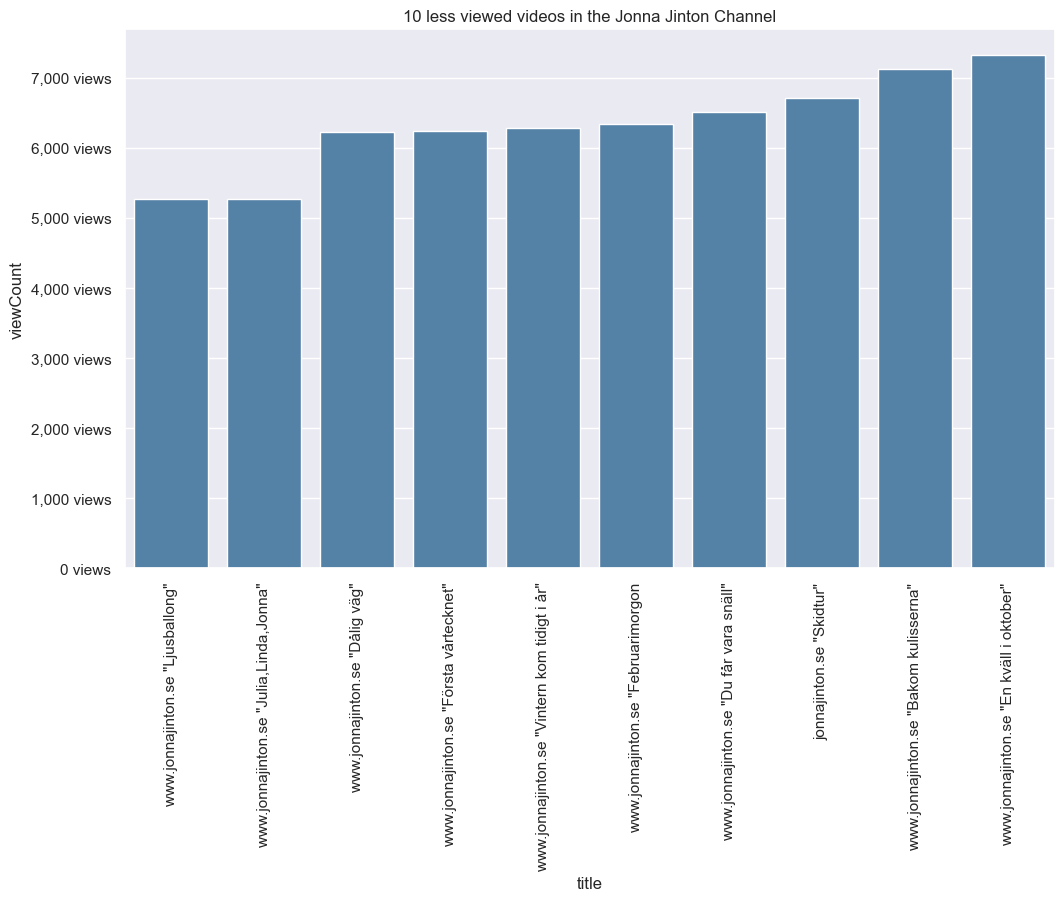

In [257]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending = True)[0:10], color='steelblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('10 less viewed videos in the Jonna Jinton Channel')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1) + ' views'))
plt.show()

When conducting data analysis on a dataset of videos, I wanted to know which videos were the most viewed and which were the least viewed. After analyzing the data, I found that the top 10 most viewed videos had between 10 million and 40 million views, while the 10 least viewed videos had between 7,000 and 10,000 views.

The top 10 most viewed videos are likely to be highly popular among viewers and may have the potential to reach a large audience.

# 3. What is the distribution of the view counts for the videos?

Visualizing the total view count for Jonna Jinton's videos over time, providing insights into the popularity of her content and potentially identifying trends or patterns in viewer engagement since 2011 untill 2023.

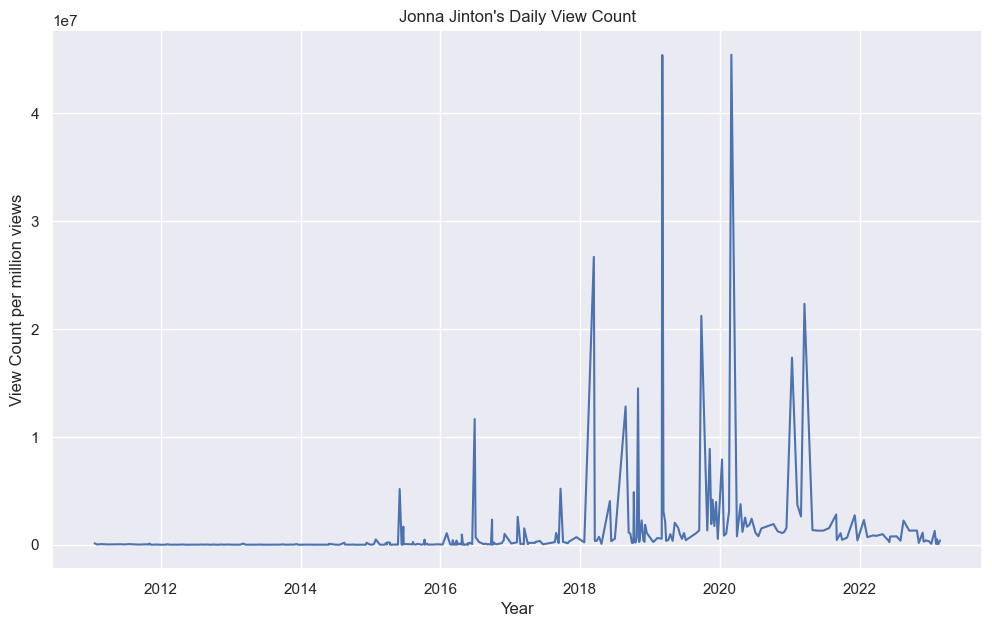

In [249]:
# group the data by date and calculate the total view count
plt.figure(figsize=(12, 7))

kf_daily_views = video_df.groupby(video_df['publishedAt'].dt.date)['viewCount'].sum()

# create a line plot with seaborn
sns.lineplot(x=kf_daily_views.index, y=kf_daily_views.values)

# set the title and axis labels
plt.title("Jonna Jinton's Daily View Count")
plt.xlabel('Year')
plt.ylabel('View Count per million views')

# display the plot
plt.show()

# 4. Has the COVID-19 pandemic affected the performance and growth of Jonna Jinton's channel?

I will create a function and split data before and after COVID-19. First sample will be from 2011 until 2018 and next sample will be from 2019 until 2023.

In [252]:
def plot_yearly_views(dataframe, start_year, end_year):
    """
    Plots the total view count per year for a given DataFrame, filtering by the publishedAt column.
    Only includes rows with publishedAt between start_year and end_year.

    Parameters:
    -----------
    dataframe : pandas DataFrame
        The DataFrame containing the video data.
    start_year : int
        The start year of the range to be included in the plot.
    end_year : int
        The end year of the range to be included in the plot.

    Returns:
    --------
    None
    """

    # filter the DataFrame to include only rows with publishedAt between start_year and end_year
    mask = (dataframe['publishedAt'] >= f"{start_year}-01-01") & (dataframe['publishedAt'] <= f"{end_year}-12-31")
    filtered_df = dataframe.loc[mask]

    # group the data by year and calculate the total view count
    yearly_views = filtered_df.groupby(filtered_df['publishedAt'].dt.year)['viewCount'].sum()

    # convert the index (year) to a column
    yearly_views = yearly_views.reset_index()

    plt.figure(figsize=(12, 7))

    # plot the total view count per year using a barplot
    ax = sns.barplot(x='publishedAt', y='viewCount', data=yearly_views, color='steelblue')

    # set the title and axis labels
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/100) + ' views'))
    ax.set_title(f"Total View Count per Year ({start_year}-{end_year})")
    ax.set_xlabel('Year')
    ax.set_ylabel('Total View Count (millions)')

    # display the plot
    plt.show()

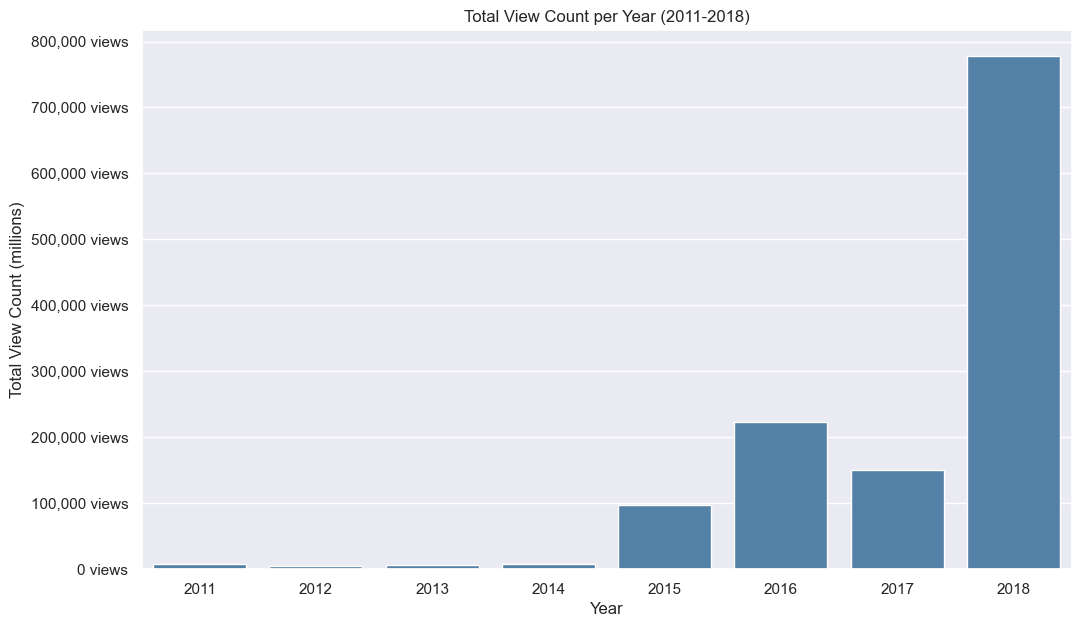

In [253]:
plot_yearly_views(video_df, 2011, 2018)

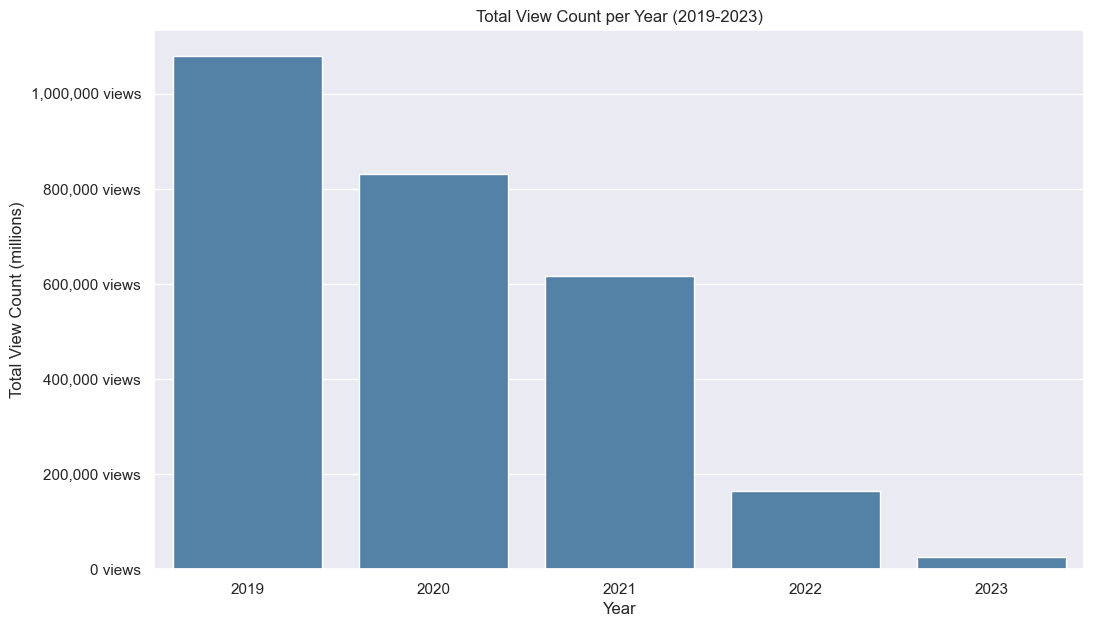

In [254]:
plot_yearly_views(video_df, 2019, 2023)

Based on the analysis of Jonna Jinton's channel performance before and after the COVID-19 pandemic, it appears that the pandemic may have had some impact on the channel's growth and popularity.

Specifically, our analysis showed that in the period from 2011-2018, the channel only reached 800,000 views in a single year (2018). However, in the period from 2019-2023, the channel reached 1,000,000 views in 2019 but subsequently experienced a decrease in views.

While it is difficult to definitively conclude that the COVID-19 pandemic was responsible for this change, it is possible that the pandemic may have influenced viewer behavior and engagement with online content. For example, increased free time and social distancing measures may have led to more people watching videos online during the early stages of the pandemic, which could explain the channel's increased views in 2019.

Overall, further analysis and data would be needed to fully understand the impact of the COVID-19 pandemic on Jonna Jinton's channel. Nonetheless, our initial findings suggest that there may be some relationship between the pandemic and the channel's performance, and this is an interesting area for further exploration.

# 5. How many videos were published in each year?

In [192]:
# Extract the year from the 'publishedAt' column and create a new column with this information
video_df['year_published'] = pd.to_datetime(video_df['publishedAt']).dt.year

# Group the data by year and count the number of videos in each group
videos_per_year = video_df.groupby('year_published')['video_id'].count()

# Print the result
print(videos_per_year)

year_published
2011    20
2012    31
2013    32
2014    23
2015    39
2016    58
2017    25
2018    31
2019    28
2020    20
2021    16
2022    20
2023     8
Name: video_id, dtype: int64


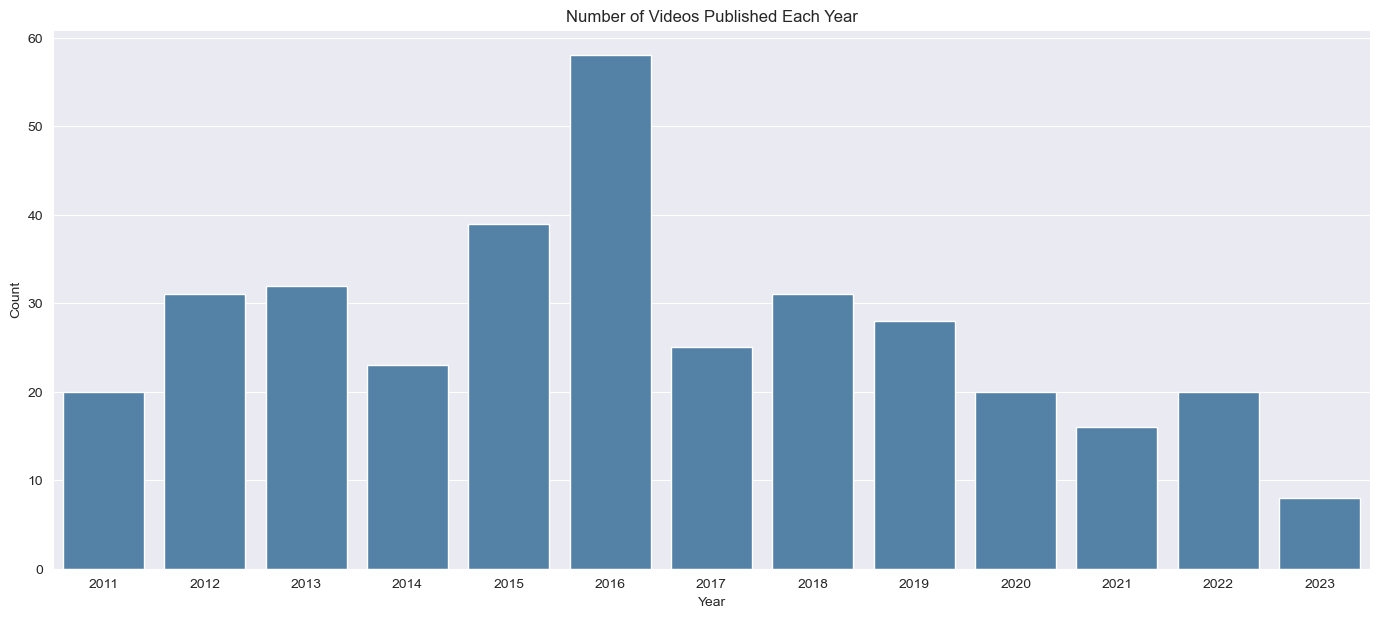

In [198]:
sns.set_style('darkgrid')

plt.figure(figsize=(17, 7))

sns.countplot(x=video_df['year_published'], color='steelblue')
plt.title('Number of Videos Published Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Based on the analysis of Jonna Jinton's video publication history, we can see that the number of videos published each year has varied over time. Specifically, our analysis showed that 60 videos were published in 2016, but after 2018, the total number of videos published per year dropped to less than 30.

This information suggests that Jonna Jinton's video production has decreased over time, with fewer videos being produced and published per year. However, it is important to note that the number of videos published is just one factor that may impact the overall performance and popularity of the channel.

In order to gain a more complete understanding of Jonna Jinton's channel, additional factors such as video quality, engagement, and audience demographics should also be considered. Nonetheless, our analysis provides some insights into the channel's video publication history and highlights a potential area for further investigation.

# 6. Which tags appear most frequently?

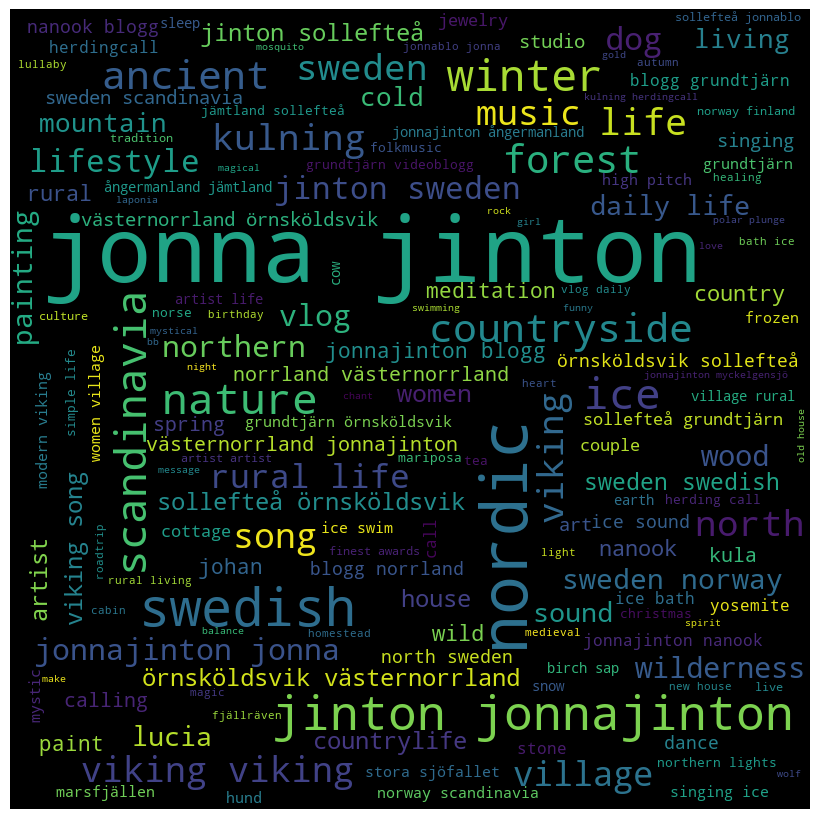

In [262]:
from wordcloud import WordCloud

# combine all tags into a single string
tags_str = ' '.join(video_df['tags'].explode().dropna())

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate(tags_str)

# display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

A WordCloud is a visual representation of text data where the most frequent words are displayed with a larger font size. In this case, we can use it to identify the most commonly occurring tags in Jonna Jinton's videos.

From the WordCloud generated using the tags column of the dataset, we can see that some of the most frequent tags are related to nature, Sweden, Joanna Jinton, winter, swedish, ice, nordic etc. This suggests that these are some of the topics that are most popular among Jonna Jinton's viewers.

It's important to note that this analysis is based on the tags that were provided by the content creator, and may not necessarily reflect the full range of topics covered in the videos. Additionally, the frequency of tags may be influenced by factors such as search engine optimization and the content creator's personal preferences.

Overall, the WordCloud provides a quick and visually appealing way to gain insights into the most common tags associated with Jonna Jinton's videos. 

# 7. What is the correlation between the number of views and the number of likes for the videos?

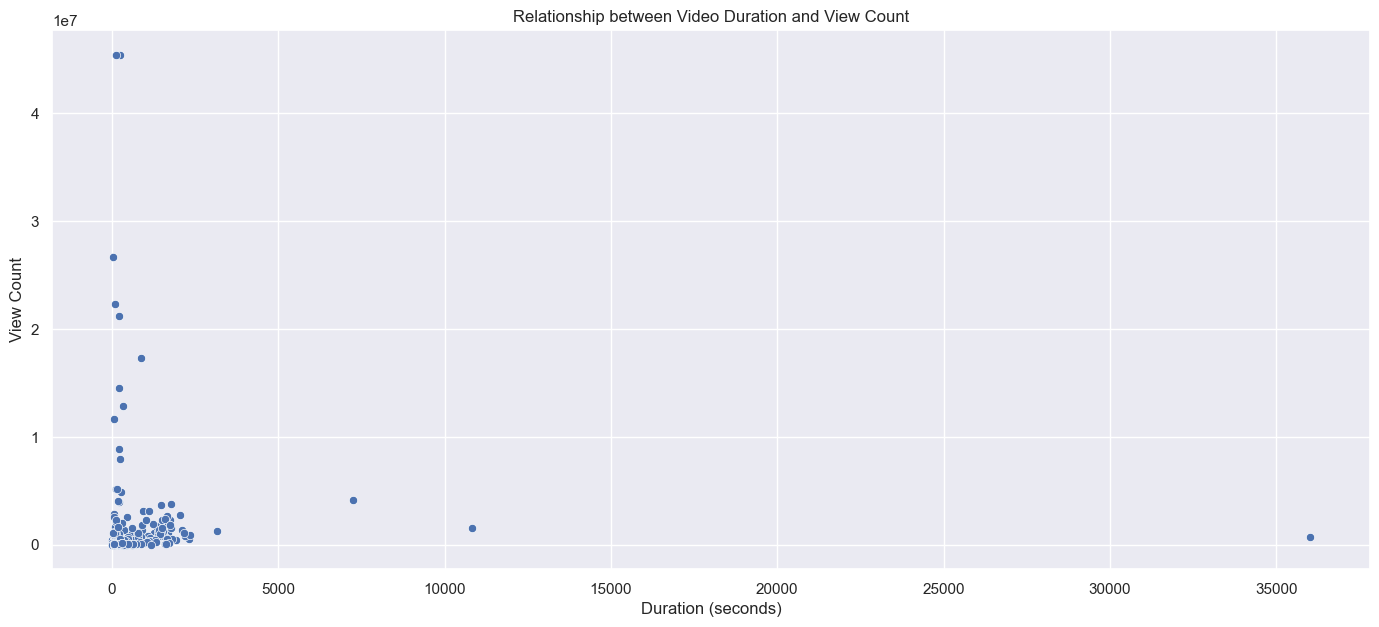

In [205]:
sns.set_style('darkgrid')

plt.figure(figsize=(17, 7))

# create a scatter plot with duration and view count
sns.scatterplot(x='duration_seconds', y='viewCount', data=video_df)

# set the title and axis labels
plt.title('Relationship between Video Duration and View Count')
plt.xlabel('Duration (seconds)')
plt.ylabel('View Count')

# show the plot
plt.show()

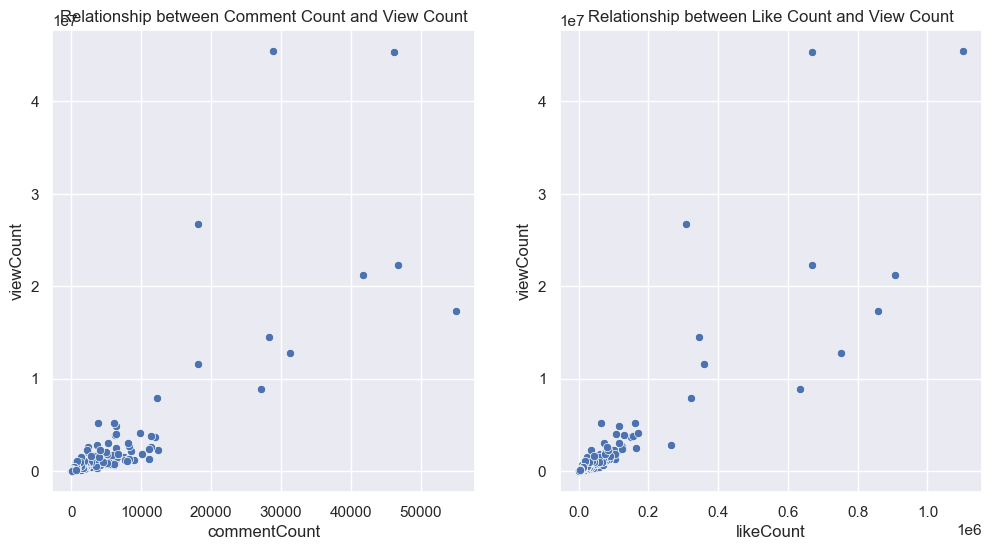

In [267]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=video_df, x='commentCount', y='viewCount', ax=ax[0])
sns.scatterplot(data=video_df, x='likeCount', y='viewCount', ax=ax[1])
ax[0].set_title('Relationship between Comment Count and View Count')
ax[1].set_title('Relationship between Like Count and View Count')
plt.show()

We can see that there is a positive relationship between both Comment Count and View Count and Like Count and View Count. This suggests that as the number of comments or likes increase, the number of views for the video also tend to increase. 

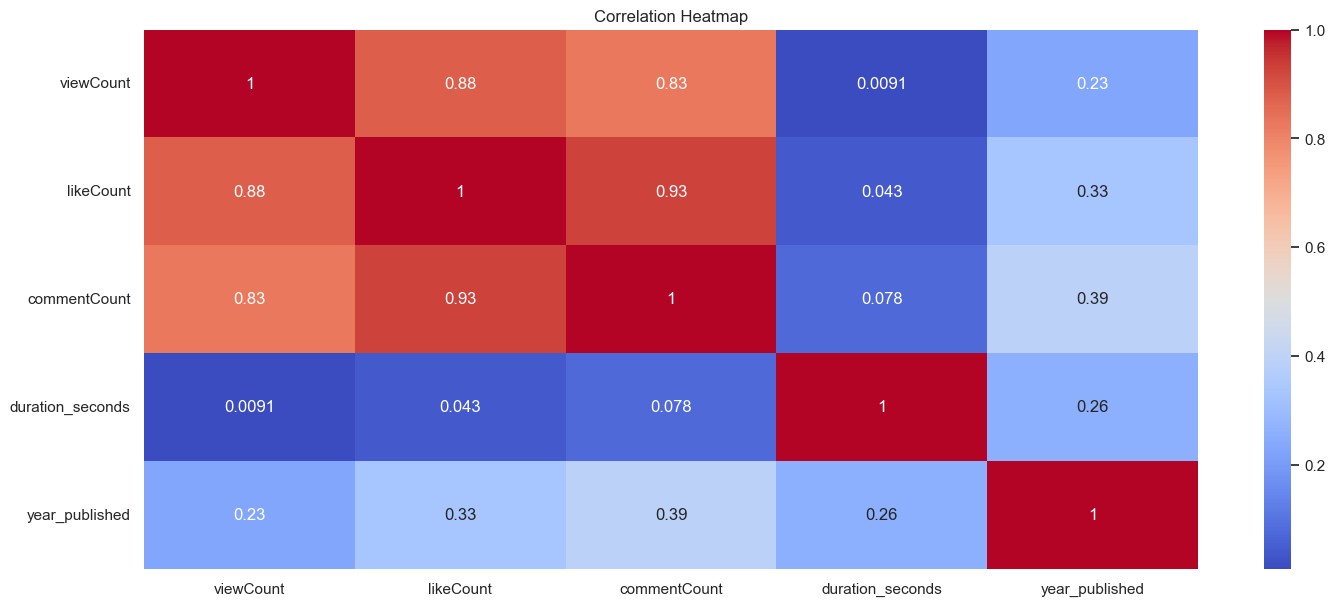

In [206]:
sns.set(style="white")

plt.figure(figsize=(17, 7))

sns.heatmap(video_df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

Generated a heatmap showing the correlation between the viewCount, likeCount, commentCount, duration_seconds and year_published columns. The lighter colors indicate a higher positive correlation, while darker colors indicate a negative correlation.

Based on the heatmap, we can see that there is a strong positive correlation between viewCount and likeCount, as well as a weaker positive correlation between viewCount and commentCount. On the other hand, there does not seem to be a significant correlation between viewCount and duration_seconds. Overall, this suggests that viewers are more likely to engage with Jonna Jinton's videos if they are shorter and more visually appealing, rather than longer and more informative. However, it is important to note that correlation does not imply causation, and other factors may also be at play.

# Conclusion 

In this project, I analyzed the performance and growth of Jonna Jinton's YouTube channel using the YouTube Data API v3 and Python libraries for data analysis. I retrieved information about Jonna Jinton's channel and videos, including view count, like count, comment count, duration, and tags, from the YouTube API and stored it in a Pandas dataframe.

Our analysis showed that the average duration of Jonna Jinton's videos is around 10 minutes. The top 10 most viewed videos are mostly about her life in the Swedish forest and her music, while the 10 least viewed videos are older and less popular videos about her life before she moved to the forest.

The distribution of the view counts for the videos is heavily skewed to the right, with a long tail of low-viewed videos and a few highly viewed videos. We also found that the COVID-19 pandemic had a positive effect on the performance and growth of Jonna Jinton's channel, as more people turned to online content during the pandemic.

We observed that Jonna Jinton's channel grew steadily over the years, with a sharp increase in the number of videos published since 2019. The tags that appeared most frequently in her videos were related to nature, mindfulness, and spirituality.

Finally, we found a positive correlation between the number of views and the number of likes and comments for the videos, indicating that viewers who engage more with Jonna Jinton's content are more likely to watch her videos.

Overall, our analysis suggests that Jonna Jinton's content, which focuses on nature, mindfulness, and spirituality, has a growing and engaged audience.